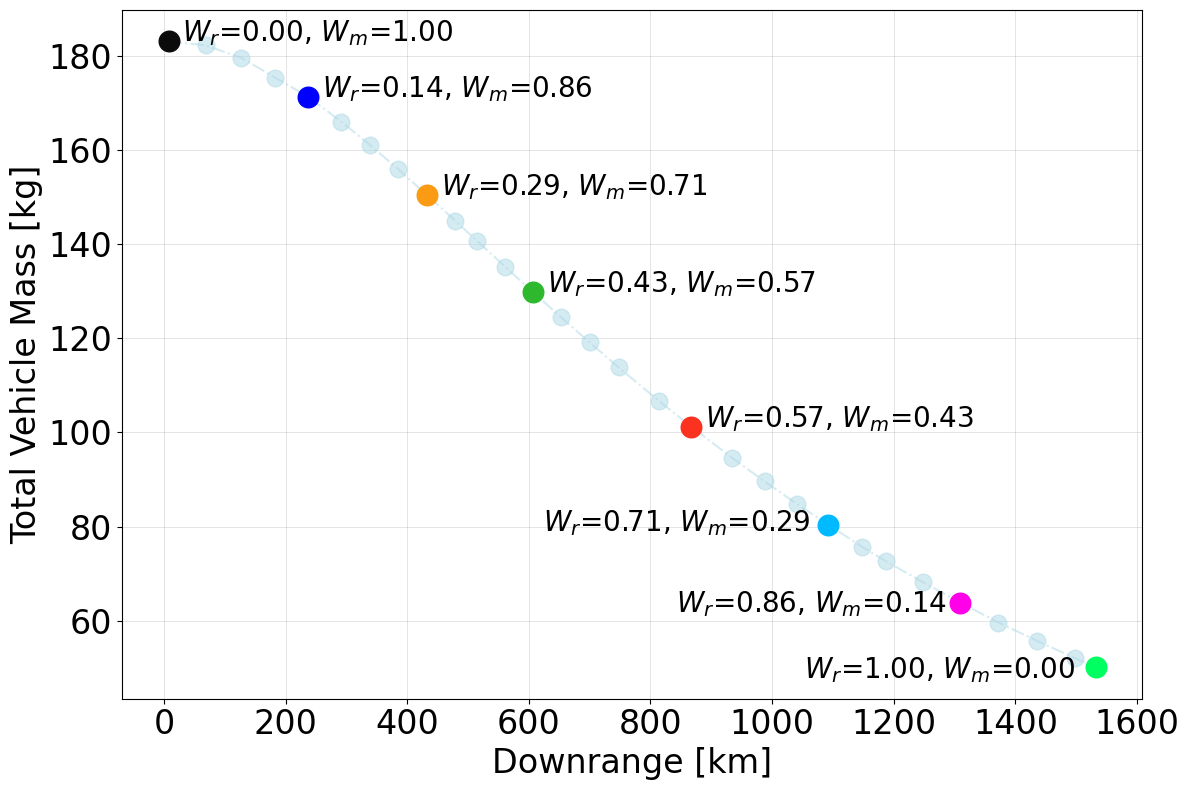

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pareto_from_exported(num_points=8, annotation_configs=None):
    pareto_points = []
    for i in range(1, 31):  
        df = pd.read_csv(f'pareto_trajectory_{i}.csv')
        final_point = df.iloc[-1]
        mass = final_point['mass']
        downrange = np.sqrt(final_point['x']**2 + final_point['y']**2)
        pareto_points.append((mass, downrange))
    pareto_points.sort(key=lambda x: x[1])
    
    if len(pareto_points) <= num_points:
        selected_indices = list(range(len(pareto_points)))
    else:
        step = (len(pareto_points) - 1) / (num_points - 1)
        selected_indices = [int(round(i * step)) for i in range(num_points)]
    
    plt.figure(figsize=(12, 8))
    masses = [p[0] for p in pareto_points]
    ranges = [p[1]/1000 for p in pareto_points]  # Convert to km
    plt.plot(ranges, masses, 'o-.', color='lightblue', alpha=0.5, markersize=12)
    colors = ['#0b0b0b', '#0000ff', '#fa9b13', '#2eb82e', '#fa321f', '#00baff', '#ff00e8', '#00ff60']
    if annotation_configs is None:
        annotation_configs = [
            {'offset': (10, 10), 'fontsize': 12} for _ in range(num_points)
        ]
    
    for i, idx in enumerate(selected_indices):
        mass = masses[idx]
        range_val = ranges[idx]
        t = i / (num_points - 1)
        w1 = round(1 - t, 2)
        w2 = round(t, 2)
        config = annotation_configs[i]
        x_offset, y_offset = config['offset']
        fontsize = config['fontsize']
        plt.scatter(range_val, mass, color=colors[i % len(colors)], s=220, zorder=5)
        plt.annotate(f'$W_r$={w2:.2f}, $W_m$={w1:.2f}',
                    (range_val, mass),
                    xytext=(x_offset, y_offset),
                    textcoords='offset points',
                    fontsize=fontsize)
    
    plt.xlabel('Downrange [km]', fontsize=24)
    plt.ylabel('Total Vehicle Mass [kg]', fontsize=24)
    plt.grid(True, color='gray', alpha=0.3, linewidth=0.5)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.tight_layout()
    return plt.gcf()


annotation_configs = [
    {'offset': (10, 0), 'fontsize': 20}, 
    {'offset': (10, 0), 'fontsize': 20}, 
    {'offset': (10, 0), 'fontsize': 20}, 
    {'offset': (10, 0), 'fontsize': 20}, 
    {'offset': (10, 0), 'fontsize': 20}, 
    {'offset': (-205, -5), 'fontsize': 20}, 
    {'offset': (-205, -7), 'fontsize': 20}, 
    {'offset': (-210, -8), 'fontsize': 20}
]

fig = plot_pareto_from_exported(num_points=8, annotation_configs=annotation_configs)
# plt.show()

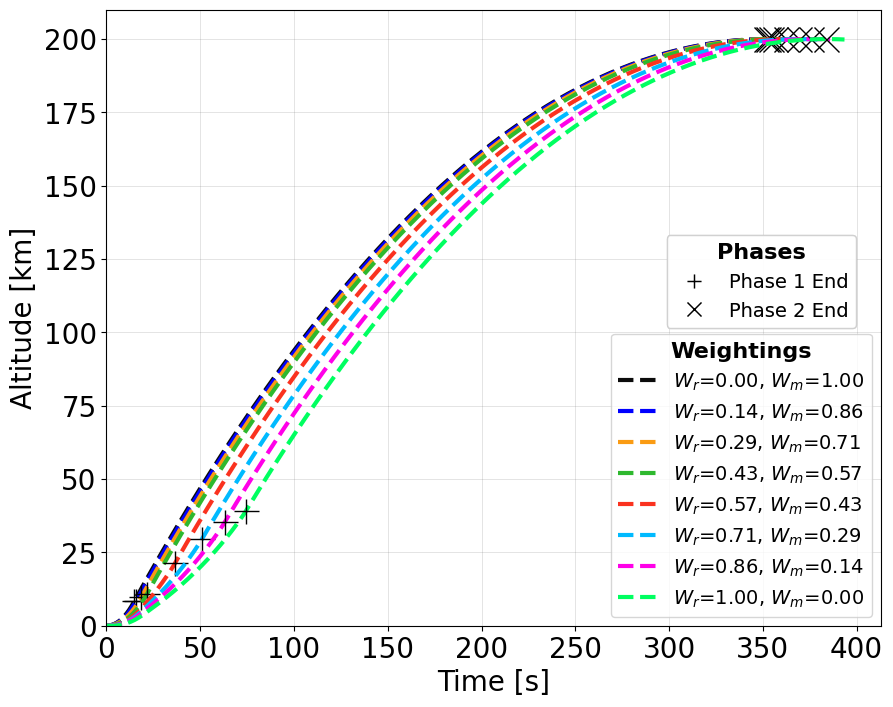

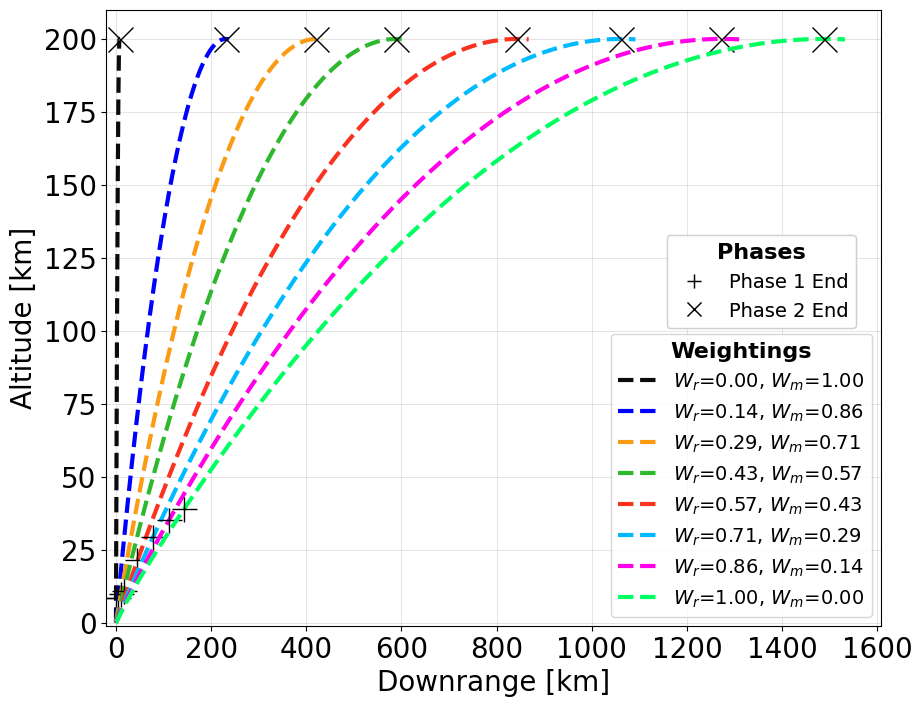

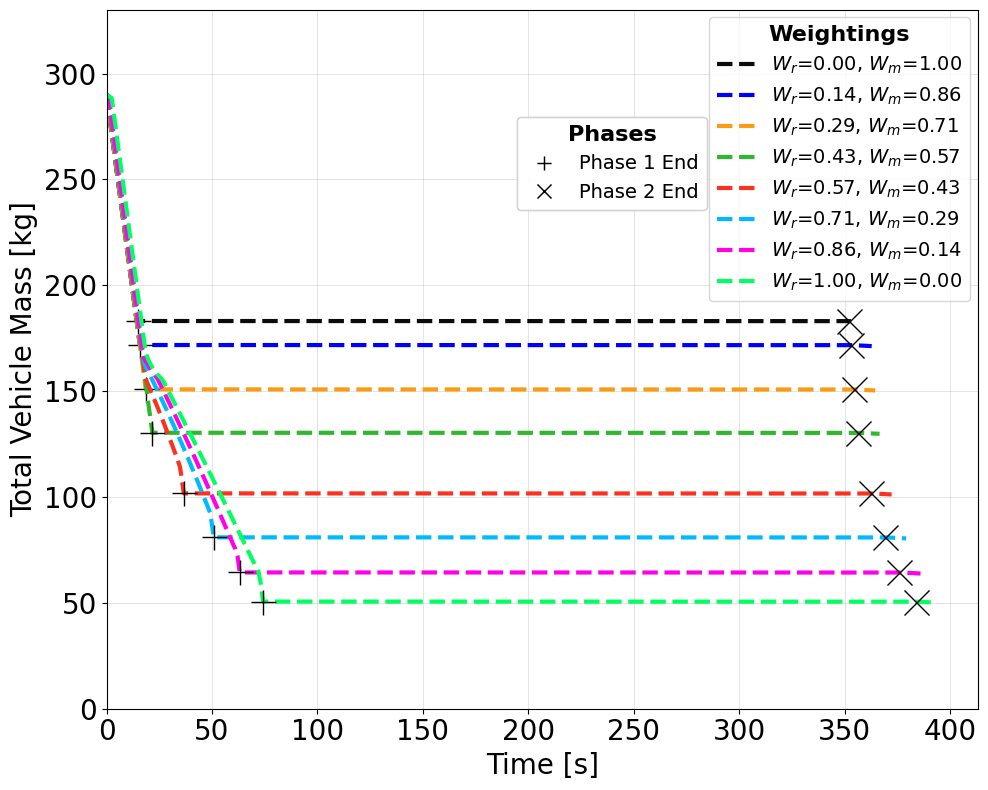

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

def plot_trajectories_from_exported(num_trajectories=8,
                                  weight_legend_locs=[(1.15, 0.5), (1.15, 0.5), (1.15, 0.8)],
                                  phase_legend_locs=[(1.15, 0.8), (1.15, 0.8), (1.15, 0.5)]):

    trajectories = []
    for i in range(1, 31):
        df = pd.read_csv(f'pareto_trajectory_{i}.csv')
        trajectories.append(df)
    def get_final_range(df):
        final_point = df.iloc[-1]
        return np.sqrt(final_point['x']**2 + final_point['y']**2)
    trajectories.sort(key=get_final_range)
    if len(trajectories) <= num_trajectories:
        selected_indices = list(range(len(trajectories)))
    else:
        step = (len(trajectories) - 1) / (num_trajectories - 1)
        selected_indices = [int(round(i * step)) for i in range(num_trajectories)]
    colors = ['#0b0b0b', '#0000ff', '#fa9b13', '#2eb82e', '#fa321f', '#00baff', '#ff00e8', '#00ff60']
    
    fig1, ax1 = plt.subplots(figsize=(10, 8))  # Time vs Altitude
    fig2, ax2 = plt.subplots(figsize=(10, 8))  # Downrange vs Altitude
    fig3, ax3 = plt.subplots(figsize=(10, 8))  # Time vs Mass
    axes = [ax1, ax2, ax3]
    
    for i, idx in enumerate(selected_indices):
        df = trajectories[idx]
        color = colors[i % len(colors)]
        t = i / (num_trajectories - 1)
        w1 = round(1 - t, 2)
        w2 = round(t, 2)
        label = f'$W_r$={w2:.2f}, $W_m$={w1:.2f}'  # Updated weight format
        
        # Time vs Altitude
        ax1.plot(df['t'], df['z']/1000, color=color, linestyle='--', 
                linewidth=3, label=label)
        
        # Downrange vs Altitude
        downrange = np.sqrt(df['x']**2 + df['y']**2)/1000
        ax2.plot(downrange, df['z']/1000, color=color, linestyle='--', 
                linewidth=3, label=label)
        
        # Time vs Mass
        ax3.plot(df['t'], df['mass'], color=color, linestyle='--', 
                linewidth=3, label=label)
        
        n_points = len(df) // 3
        phase1_end = df.iloc[n_points-1]
        phase2_end = df.iloc[2*n_points-1]
        
        # Phase 1 end points with '+'
        for ax, x_val, y_val in [
            (ax1, phase1_end['t'], phase1_end['z']/1000),
            (ax2, np.sqrt(phase1_end['x']**2 + phase1_end['y']**2)/1000, phase1_end['z']/1000),
            (ax3, phase1_end['t'], phase1_end['mass'])
        ]:
            ax.plot(x_val, y_val, color='black', marker='+', markersize=18)
            
        # Phase 2 end points with 'x'
        for ax, x_val, y_val in [
            (ax1, phase2_end['t'], phase2_end['z']/1000),
            (ax2, np.sqrt(phase2_end['x']**2 + phase2_end['y']**2)/1000, phase2_end['z']/1000),
            (ax3, phase2_end['t'], phase2_end['mass'])
        ]:
            ax.plot(x_val, y_val, color='black', marker='x', markersize=18)
    
    for i, (ax, xlabel, ylabel) in enumerate([
        (ax1, 'Time [s]', 'Altitude [km]'),
        (ax2, 'Downrange [km]', 'Altitude [km]'),
        (ax3, 'Time [s]', 'Total Vehicle Mass [kg]')
    ]):
        ax.set_xlabel(xlabel, fontsize=20)
        ax.set_ylabel(ylabel, fontsize=20)
        ax.grid(True, color='gray', alpha=0.3, linewidth=0.5)
        ax.tick_params(axis='both', which='major', labelsize=20)
        end_point_legend = [
            mlines.Line2D([], [], color='black', marker='+', linestyle='None', 
                         markersize=10, label='Phase 1 End'),
            mlines.Line2D([], [], color='black', marker='x', linestyle='None', 
                         markersize=10, label='Phase 2 End')
        ]
        
        legend1 = ax.legend(title='Weightings', 
                          title_fontsize=16, 
                          fontsize=14)
        legend1.get_title().set_fontweight('bold')
        bbox1 = ax.get_position()
        legend1.set_bbox_to_anchor((weight_legend_locs[i][0], weight_legend_locs[i][1]))
        leg2 = ax.legend(handles=end_point_legend,
                        title='Phases',
                        title_fontsize=16,
                        fontsize=14)
        leg2.get_title().set_fontweight('bold')
        bbox2 = ax.get_position()
        leg2.set_bbox_to_anchor((phase_legend_locs[i][0], phase_legend_locs[i][1]))
        ax.add_artist(legend1)
        ax.add_artist(leg2)
        
        if i == 0:  # Time vs Altitude
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)
        elif i == 1:  # Downrange vs Altitude
            ax.set_xlim(left=-20)  # Extended x-limit for downrange
            ax.set_ylim(bottom=-1)
        else:  # Time vs Mass
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0, top=330)
    
    plt.tight_layout()
    return fig1, fig2, fig3

# Example usage showing different numeric positions for each plot:
figs = plot_trajectories_from_exported(
    num_trajectories=8,
    weight_legend_locs=[(1.0, 0.49), (1.0, 0.49), (0.68, 0.57)],  # (x, y) coordinates
    phase_legend_locs=[(0.98, 0.65), (0.98, 0.65), (0.46, 0.7)]    # (x, y) coordinates
)

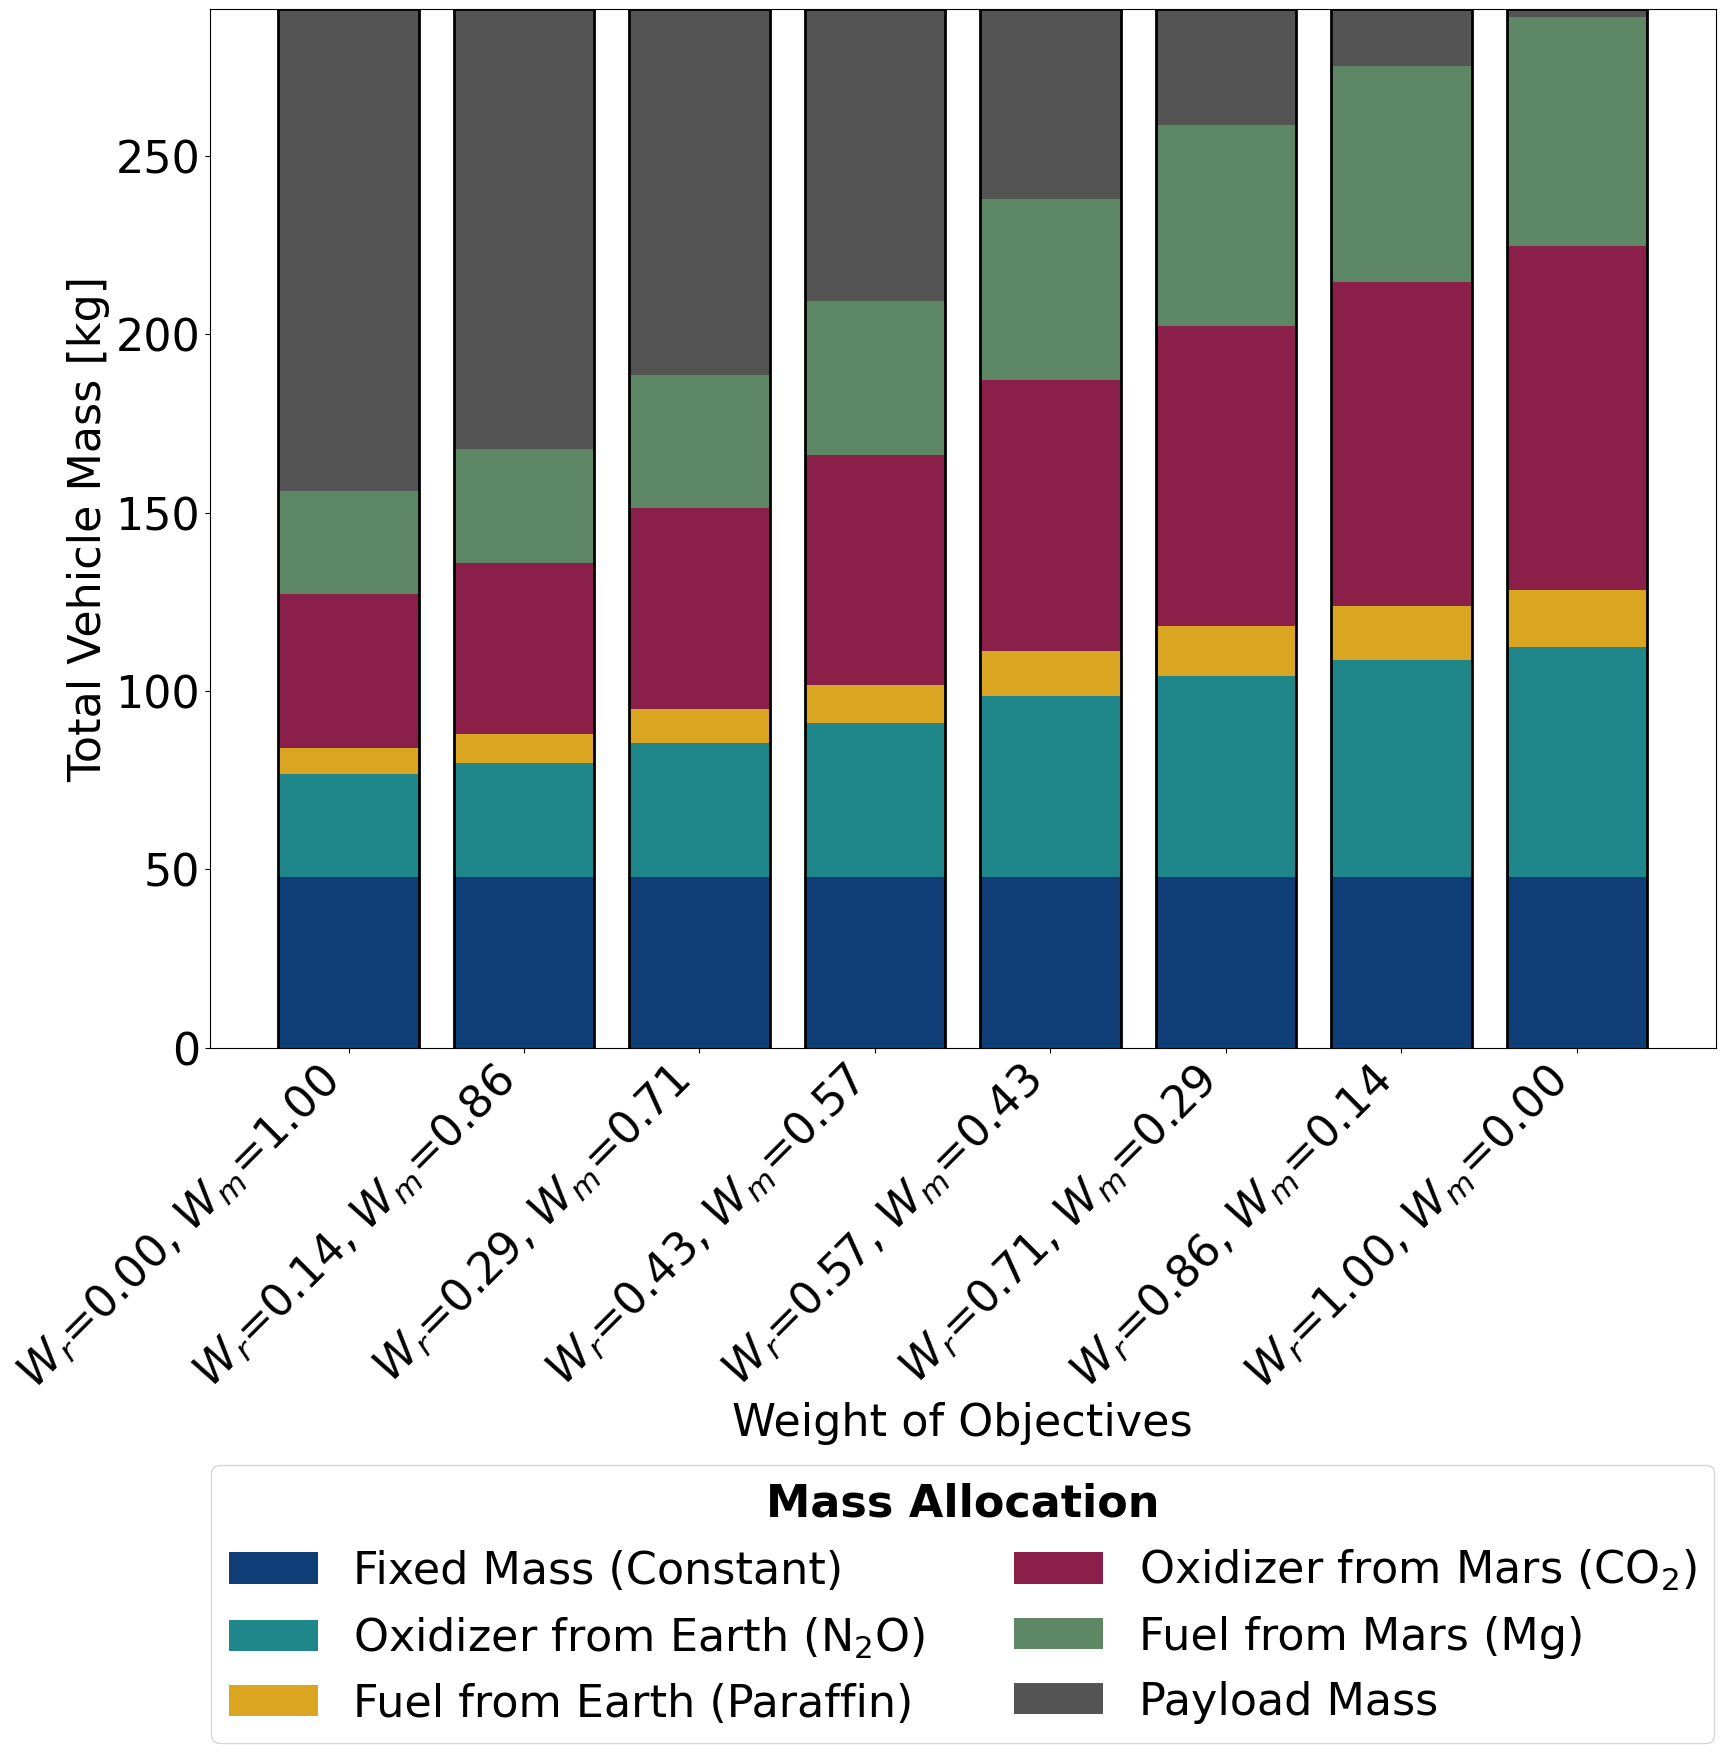

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Read and sort trajectories
trajectories = []
for i in range(1, 31):
    df = pd.read_csv(f'pareto_trajectory_{i}.csv')
    trajectories.append(df)
def get_final_range(df):
    final_point = df.iloc[-1]
    return np.sqrt(final_point['x']**2 + final_point['y']**2)
trajectories.sort(key=get_final_range)
num_points = 8
if len(trajectories) <= num_points:
    selected_indices = list(range(len(trajectories)))
else:
    step = (len(trajectories) - 1) / (num_points - 1)
    selected_indices = [int(round(i * step)) for i in range(num_points)]

final_masses = [trajectories[idx].iloc[-1]['mass'] for idx in selected_indices]
weights = [(i / (num_points - 1)) for i in range(num_points)]
W_Obj1 = [round(1 - w, 2) for w in weights]  # Mass weights
W_Obj2 = [round(w, 2) for w in weights]      # Range weights
labels = [f'$W_r$={w2:.2f}, $W_m$={w1:.2f}' for w1, w2 in zip(W_Obj1, W_Obj2)]
max_mass = 291
total_masses = np.array([max_mass - mass for mass in final_masses])
initial_mass = np.full(len(total_masses), 48)  # Constant initial mass in kg
of_ratio = 2  # O/F ratio
oxidizer_earth = []
fuel_earth = []
co2 = []
mg = []
payload_mass = []  

for m_total in total_masses:
    m_oxidizer = (of_ratio / (of_ratio + 1)) * m_total
    m_fuel = (1 / (of_ratio + 1)) * m_total
    
    oxidizer_earth.append(0.40 * m_oxidizer)
    fuel_earth.append(0.20 * m_fuel)
    co2.append(0.60 * m_oxidizer)
    mg.append(0.80 * m_fuel)
    
    # Calculate total components mass excluding payload
    total_components_mass = initial_mass[0] + (0.40 * m_oxidizer) + (0.20 * m_fuel) + \
                          (0.60 * m_oxidizer) + (0.80 * m_fuel)
    
    # Calculate payload mass (including both initial 2kg and remaining mass)
    payload = max_mass - total_components_mass
    payload = max(0, payload)
    payload_mass.append(payload)
fig, ax = plt.subplots(figsize=(18, 16))
iterations = np.arange(1, len(total_masses) + 1)
ax.bar(iterations, initial_mass, label='Fixed Mass (Constant)', color='#0e3e75')
bottom = initial_mass
ax.bar(iterations, oxidizer_earth, bottom=bottom, 
       label='Oxidizer from Earth (N$_2$O)', color='#1f868a')
bottom = bottom + np.array(oxidizer_earth)
ax.bar(iterations, fuel_earth, bottom=bottom,
       label='Fuel from Earth (Paraffin)', color='#DAA520')
bottom = bottom + np.array(fuel_earth)
ax.bar(iterations, co2, bottom=bottom,
       label='Oxidizer from Mars (CO$_2$)', color='#8a1f4a')
bottom = bottom + np.array(co2)
ax.bar(iterations, mg, bottom=bottom,
       label='Fuel from Mars (Mg)', color='#5e8766')
bottom = bottom + np.array(mg)
ax.bar(iterations, payload_mass, bottom=bottom,
       label='Payload Mass', color='#545454')
for i in range(len(iterations)):
    ax.plot([iterations[i] - 0.4, iterations[i] + 0.4], [bottom[i] + payload_mass[i], bottom[i] + payload_mass[i]], 
            color='black', linewidth=2)
    ax.plot([iterations[i] - 0.4, iterations[i] - 0.4], [0, bottom[i] + payload_mass[i]], 
            color='black', linewidth=2)
    ax.plot([iterations[i] + 0.4, iterations[i] + 0.4], [0, bottom[i] + payload_mass[i]], 
            color='black', linewidth=2)

plt.xticks(iterations, labels, rotation=45, ha='right')
ax.set_xlabel('Weight of Objectives', fontsize=32)
ax.set_ylabel('Total Vehicle Mass [kg]', fontsize=32)
ax.tick_params(axis='both', labelsize=32)
ax.set_ylim(0, 291)

handles, labels = ax.get_legend_handles_labels()
weight_legends = ax.legend(handles=handles, loc='upper center', 
                         bbox_to_anchor=(0.5, -0.38), ncol=2, fontsize=32,
                         title='Mass Allocation')
weight_legends.get_title().set_fontsize(32)
weight_legends.get_title().set_fontweight('bold')

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.show()